In [12]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

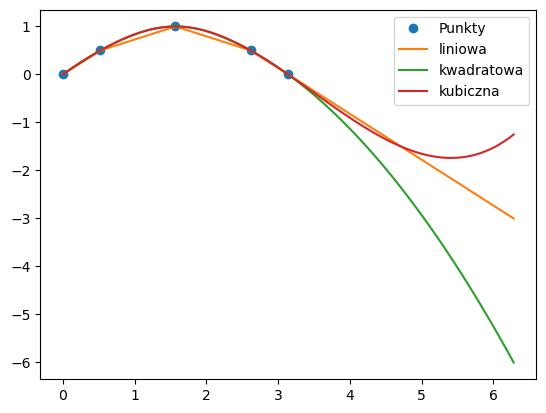

In [17]:
#Interpolacja + ekstrapolacja

x = np.array((0, np.pi/6, np.pi/2, np.pi*5/6, np.pi))
y = np.sin(x)

F_lin = interp1d(x, y, fill_value = 'extrapolate')
F_qua = interp1d(x, y, kind = 'quadratic', fill_value = 'extrapolate')
F_cub = interp1d(x, y, kind = 'cubic', fill_value = 'extrapolate')

xref = np.linspace(0, 2*np.pi, 100)
plt.plot(x, y, 'o', label = 'Punkty')
plt.plot(xref, F_lin(xref), label = 'liniowa')
plt.plot(xref, F_qua(xref), label = 'kwadratowa')
plt.plot(xref, F_cub(xref), label = 'kubiczna')
_ = plt.legend()

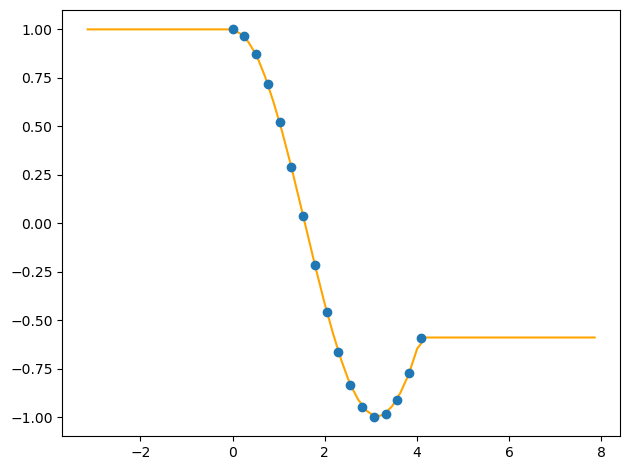

In [41]:
#Interpolacja + ekstrapolacja stała
#fill_value = (left, right)

x = np.linspace(0, 1.3*np.pi, 17)
y = np.cos(x)

func = interp1d(x, y, axis = 0, bounds_error = False, kind = 'linear', fill_value = (y[0], y[-1]))
xnew = np.linspace(-np.pi, 2.5*np.pi, 61)
ynew = func(xnew)

plt.plot(xnew, ynew, 'orange')
plt.plot(x, y, 'o')

plt.tight_layout()

Parametry dopasowania:  [2.00222734 4.90568411]
Dokładność parametrów (odchylenie standardowe):  [0.03760669 0.21766993]


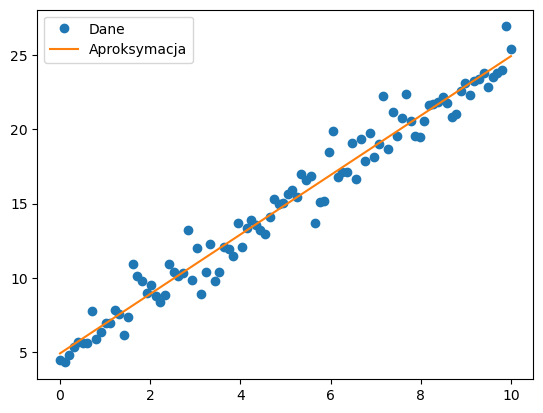

In [47]:
#Aproksymacja liniowa
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

x=np.linspace(0,10,100)
y=func(x,2,5)
yn=y+np.random.normal(size=len(x))

p_opt, p_cov = curve_fit(func, x, yn)
print('Parametry dopasowania: ', p_opt)
p_dok = np.sqrt(np.diag(p_cov))
print('Dokładność parametrów (odchylenie standardowe): ', p_dok)

plt.plot(x,yn,'o',label='Dane')
plt.plot(x, func(x,*p_opt), label='Aproksymacja')
_ = plt.legend()